# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи
HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.


Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Ответить на эти вопросы нам помогут данные о зарплатах в сфере Data Science за 2020–2022 годы.

Данные содержат следующие столбцы:
*   *work_year* — Год, в котором была выплачена зарплата;
*   *experience_level* — Опыт работы на этой должности в течение года со следующими возможными значениями: EN (Entry-level/Junio), MI (Mid-level/Intermediate), SE (Senior-level/Expert), EX (Executive-level/Director);
*   *employment_type* — Тип трудоустройства для этой роли: PT (неполный рабочий день), FT (полный рабочий день), CT (контракт), FL (фриланс);
*   *job_title* — Роль, в которой соискатель работал в течение года;
*   *salary* — Общая выплаченная валовая сумма заработной платы;
*   *salary_currency* — Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
*   *salary_in_usd* — Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
*   *employee_residence* — Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
*   *remote_ratio* — Общий объём работы, выполняемой удалённо. Возможные значения:0 - (удалённой работы нет (менее 20 %)), 50 - (частично удалённая работа), 100 - (полностью удалённая работа (более 80 %));
*   *company_location* — Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
*   *company_size* — Среднее количество людей, работавших в компании в течение года: S - (менее 50 сотрудников (небольшая компания)), M - (от 50 до 250 сотрудников (средняя компания)), L - (более 250 сотрудников (крупная компания)).

Оригинальный датасет: ["Data Science Job Salaries” (kaggle.com)"]

## 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [3]:
# загружаем датасет и проверяем корректность загрузки
data = pd.read_csv('data/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### 1.1 Описательный анализ данных

In [5]:
# получим основнуую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


<Axes: >

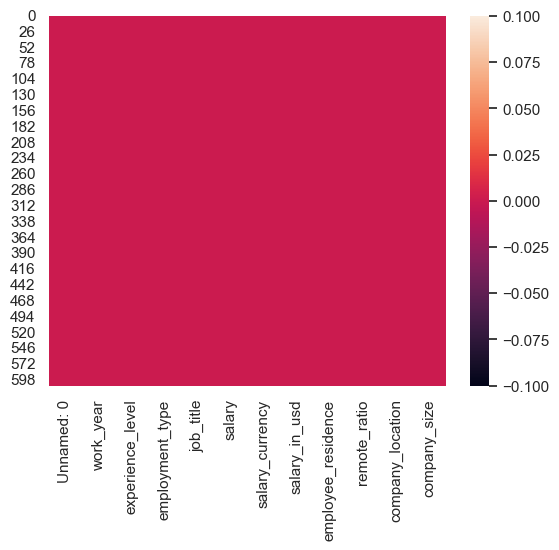

In [6]:
sns.heatmap(data.isnull()) # # убеждаемся, что датасет без пропусков

В датасете 607 записей (без пропущенных значений).

Проанализировав имеющиеся в таблице признаки, можно сделать вывод, что признаки salary и salary_currenc можно удалить, т.к. в таблице присутствует более универсальный и поддающийся статестической оработке признак salary_in_usd. Так же будет нужно признак Unnamed, не имеющий значения для статистического анализа.

In [7]:
# Удаляем столбцы "salary" и "salary_currency" из DataFrame
data = data.drop(columns=['salary', 'salary_currency', 'Unnamed: 0'])

Также необходимо проверить данные на наличие полных дубликатов.

In [8]:
# Проверяем наличие дубликатов:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


### Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков

<Axes: >

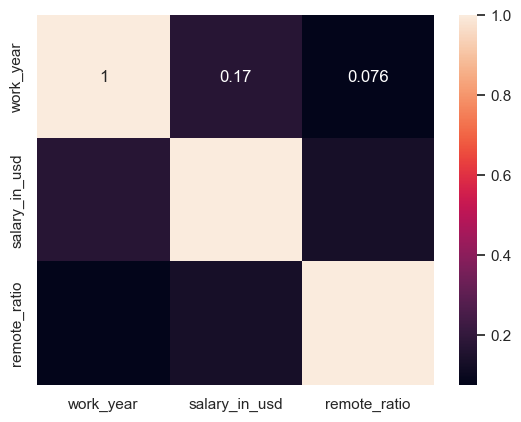

In [9]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(data.corr(numeric_only=True), annot=True)

Можно сделать вывод, что в датасете нет мультиколлинеарных признаков.

### Классификация признаков датасета на числовые и категориальные

Категориальные признаки:
*   *work_year* — Год, в котором была выплачена зарплата;
*   *experience_level* — Опыт работы на этой должности в течение года со следующими возможными значениями: EN (Entry-level/Junio), MI (Mid-level/Intermediate), SE (Senior-level/Expert), EX (Executive-level/Director);
*   *employment_type* — Тип трудоустройства для этой роли: PT (неполный рабочий день), FT (полный рабочий день), CT (контракт), FL (фриланс);
*   *job_title* — Роль, в которой соискатель работал в течение года;
*   *employee_residence* — Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
*   *remote_ratio* — Общий объём работы, выполняемой удалённо. Возможные значения:0 - (удалённой работы нет (менее 20 %)), 50 - (частично удалённая работа), 100 - (полностью удалённая работа (более 80 %));
*   *company_location* — Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
*   *company_size* — Среднее количество людей, работавших в компании в течение года: S - (менее 50 сотрудников (небольшая компания)), M - (от 50 до 250 сотрудников (средняя компания)), L - (более 250 сотрудников (крупная компания)).

Числовые признаки:
*   *salary_in_usd* — Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com)

Проверим финальный датасет на корректность типов признаков и получим основные статистические характеристики для каждого из признаков.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


Как монжно увидеть, тип int64 имеют только числовой признак salary_in_usd, а также закодированный несколькими числовыми значениями remote_ratio и признак-время work_year.

In [11]:
# основные статистические характеристики 
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.00000,NaN,NaN


### Выводы по разделу
По результатам выполнения первого раздела практического задания мы получили датасет из 8 признаков и 607 значений без дубликатов и пропусков, а также били классифицированы все признаки на числовые и категориальные, были найдены основные статистические характеристики для каждого из признаков.

## 2. Разведовательный анализ данных

### 2.1 Визуальный анализ данных

### Распределение заработной платы в долларах США по всем соискателям в сфере Data Science.

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


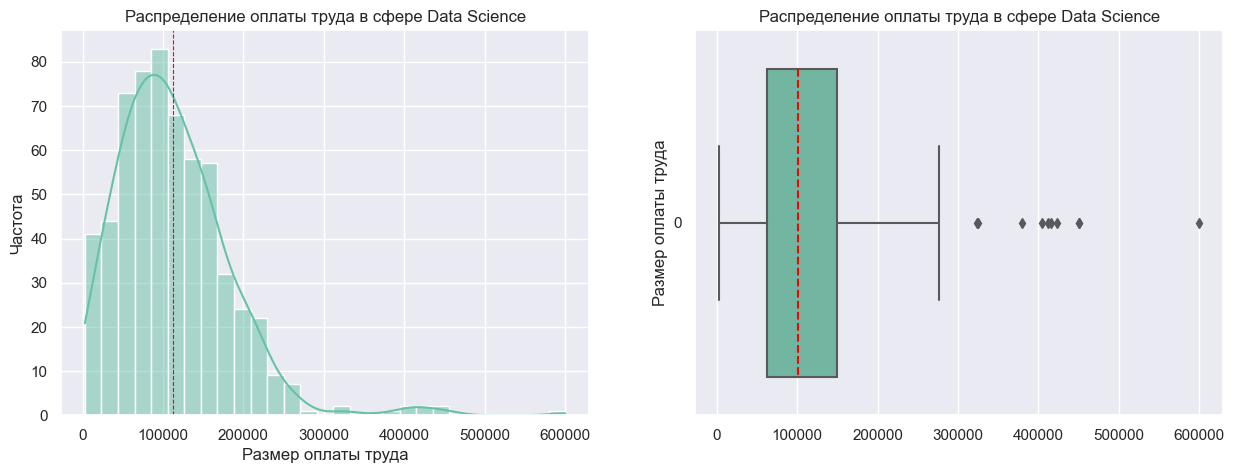

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер оплаты труда', ylabel='Частота')
axes[0].set_title('Распределение оплаты труда в сфере Data Science')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер оплаты труда')
axes[1].set_title('Распределение оплаты труда в сфере Data Science')

plt.show()

In [13]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер страховых выплат']
data_agg

,Размер страховых выплат
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение оплаты труда отлично от нормального, имеются выбросы.

### Оплата труда в зависимости от года, в котором была выплачена зарплата

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


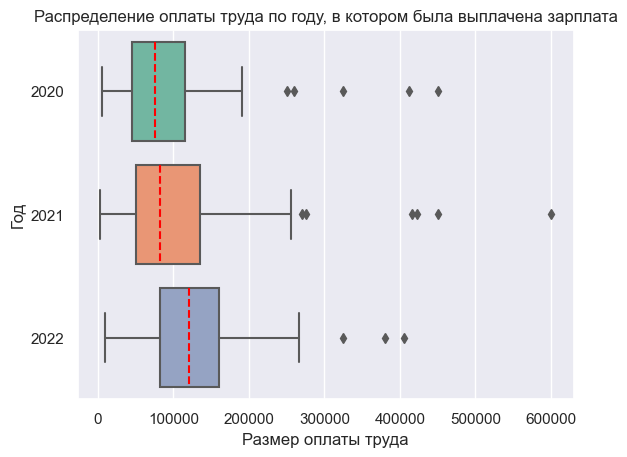

In [15]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Распределение оплаты труда по году, в котором была выплачена зарплата')
plt.show()

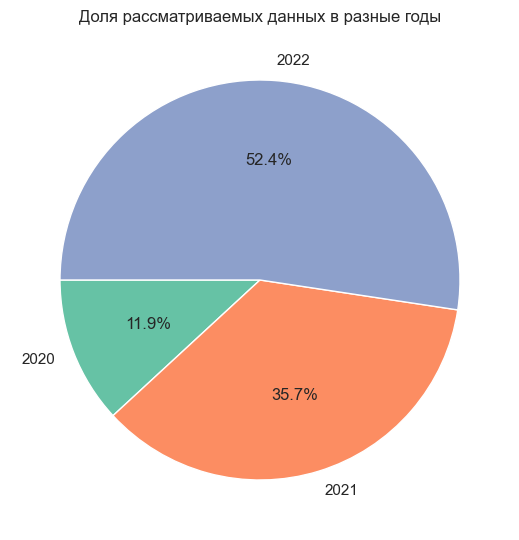

In [44]:
parts = data['work_year'].value_counts().sort_values(ascending=True)
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    parts,
    labels=parts.index,
    autopct='%.1f%%',
    startangle=180
);
axes.set_title('Доля рассматриваемых данных в разные годы');

In [17]:
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Распределение оплаты труда по году, в котором была выплачена зарплата')
data_agg

Распределение оплаты труда по году, в котором была выплачена зарплата


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


Из полученных графиков можно сделать несколько выводов: во-первых, с каждым последующим годом увеличивается количество рассматриваемых данных о соискателей, т.е. сфера становится больше, и ей требуется все больше специалистов; во-вторых, наблюдается рост средних и медианных значений размера заработной платы и уменьшается количество выбросов в данных, что также свидетельствует о росте востребованности специалистов Data Science. Чтобы определить, являются ли различия в данных статистически значимыми, в следующем разделе мы проведём статистические тесты.

Также на данном этапе можно предварительно ответить на один из вопросв агенства: Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist? 

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


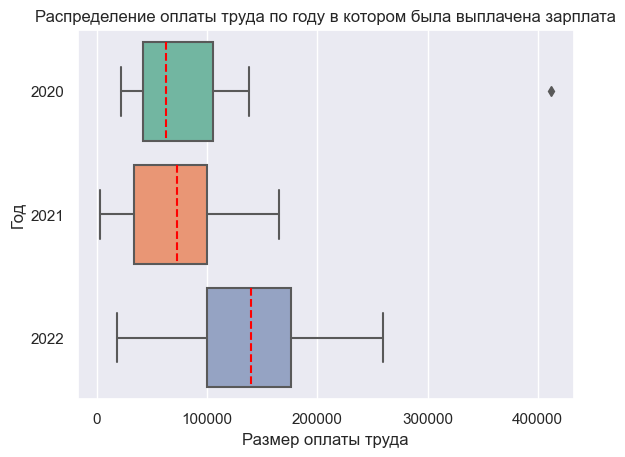

In [45]:
filtered_data = data[data['job_title'] == 'Data Scientist']

ax = sns.boxplot(filtered_data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Распределение оплаты труда по году в котором была выплачена зарплата')
plt.show()

In [19]:
data_agg = filtered_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Распределение оплаты труда по пгоду в котором была выплачена зарплата')
data_agg

Распределение оплаты труда по пгоду в котором была выплачена зарплата


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


По полученным данным можно рассудить, что ежегодный рост зарплат у Data Scientist-ов наблюдается.

### Оплата труда в зависимости от опыта работы соискателя

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


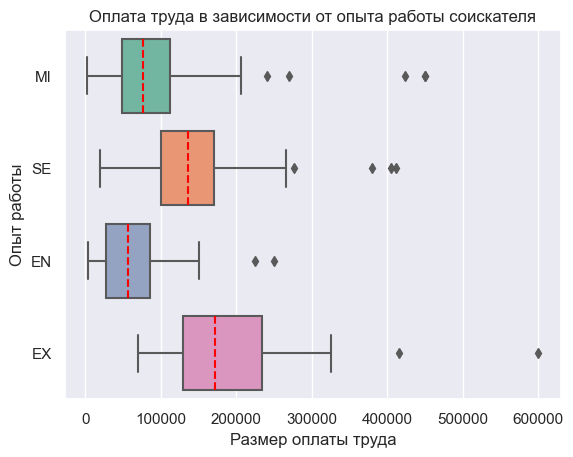

In [20]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Опыт работы')
plt.title('Оплата труда в зависимости от опыта работы соискателя')
plt.show()

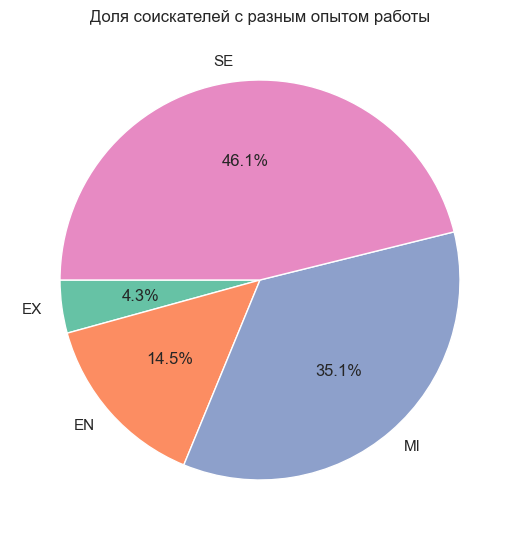

In [21]:
parts = data['experience_level'].value_counts().sort_values(ascending=True)
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    parts,
    labels=parts.index,
    autopct='%.1f%%',
    startangle=180
);
axes.set_title('Доля соискателей с разным опытом работы');

In [22]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Оплата труда в зависимости от опыта работы соискателя')
data_agg

Оплата труда в зависимости от опыта работы соискателя


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.06,63901.06,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.29,57691.98,18907.0,100000.0,135500.0,170000.00,412000.0


Среднее значение оплаты труда увеличивается с опытом работы соискателя. Наибольшее количество соискателей имеют уровень Senior и Middle. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Зависимость оплаты труда от типа трудоустройства

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


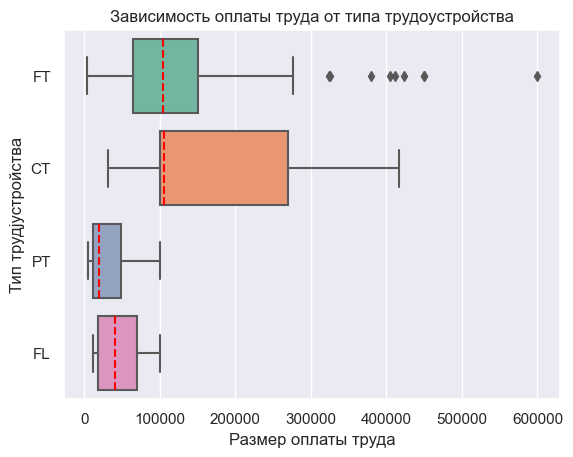

In [26]:
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Тип трудjустройства')
plt.title('Зависимость оплаты труда от типа трудоустройства')
plt.show()

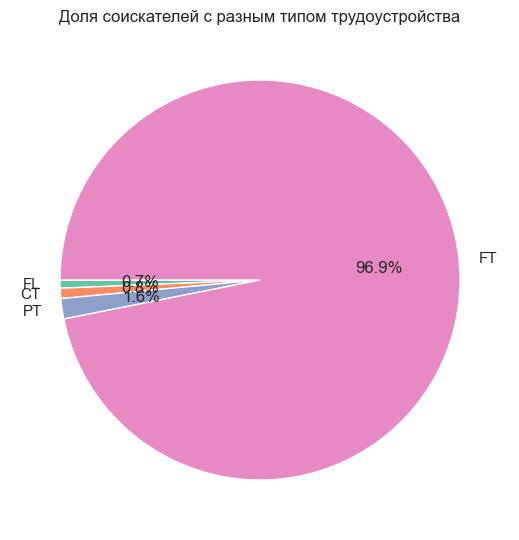

In [24]:
parts = data['employment_type'].value_counts().sort_values(ascending=True)
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    parts,
    labels=parts.index,
    autopct='%.1f%%',
    startangle=180
);
axes.set_title('Доля соискателей с разным типом трудоустройства');

In [25]:
data_agg = data.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Зависимость оплаты труда от типа трудоустройства')
data_agg

Зависимость оплаты труда от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.07,69476.47,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


Заработная плата различается в зависимости от типа трудоустройства. Также явно видно, что абсолютное большинство вакансий требует от специалиста полной занятости (полный рабочий день). Чтобы определить, являются ли полученные данные статистически значимыми, нужно провести статистические тесты.

### Зависимость оплаты труда от роли соискателя

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


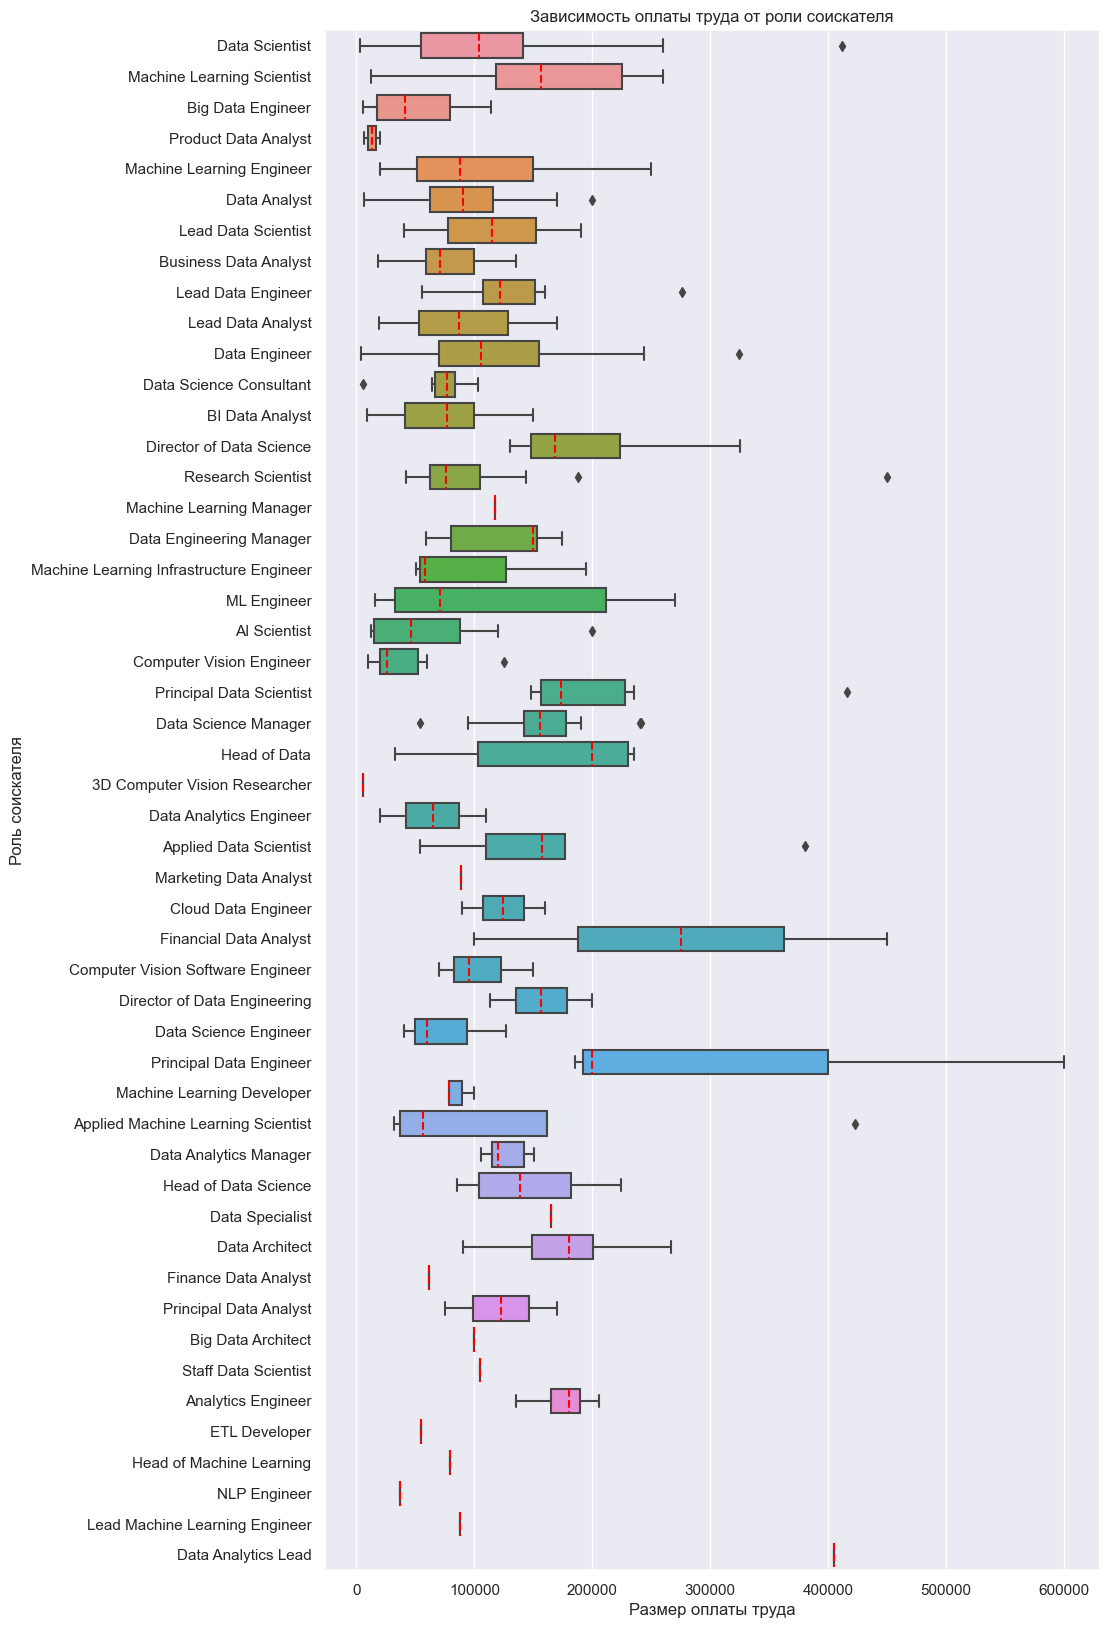

In [30]:
fig = plt.figure(figsize=(10, 20))
ax = sns.boxplot(data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Роль соискателя')
plt.title('Зависимость оплаты труда от роли соискателя')
plt.show()

In [33]:
data_agg = data.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зависимость оплаты труда от роли соискателя')
data_agg

Зависимость оплаты труда от роли соискателя


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,1.0,5409.00,NaN,5409.0,5409.00,5409.0,5409.00,5409.0
AI Scientist,7.0,66135.57,70152.16,12000.0,15026.50,45896.0,87500.00,200000.0
Analytics Engineer,4.0,175000.00,29508.08,135000.0,165000.00,179850.0,189850.00,205300.0
Applied Data Scientist,5.0,175655.00,123647.19,54238.0,110037.00,157000.0,177000.00,380000.0
Applied Machine Learning Scientist,4.0,142068.75,188246.70,31875.0,36768.75,56700.0,162000.00,423000.0
BI Data Analyst,6.0,74755.17,50989.56,9272.0,40944.25,76500.0,99500.00,150000.0
Big Data Architect,1.0,99703.00,NaN,99703.0,99703.00,99703.0,99703.00,99703.0
Big Data Engineer,8.0,51974.00,42954.76,5882.0,17557.00,41305.5,79756.00,114047.0
Business Data Analyst,5.0,76691.20,43814.85,18442.0,59102.00,70912.0,100000.00,135000.0


Т.к. в датасете представлено большое количество различных ролей, сделать какие-либо выводы из визуального анализа этого признака очень сложно. Различия между зарплатами на разных ролях довольно велики. Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Зависимость оплаты труда от страны проживания в течении рабочего года

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


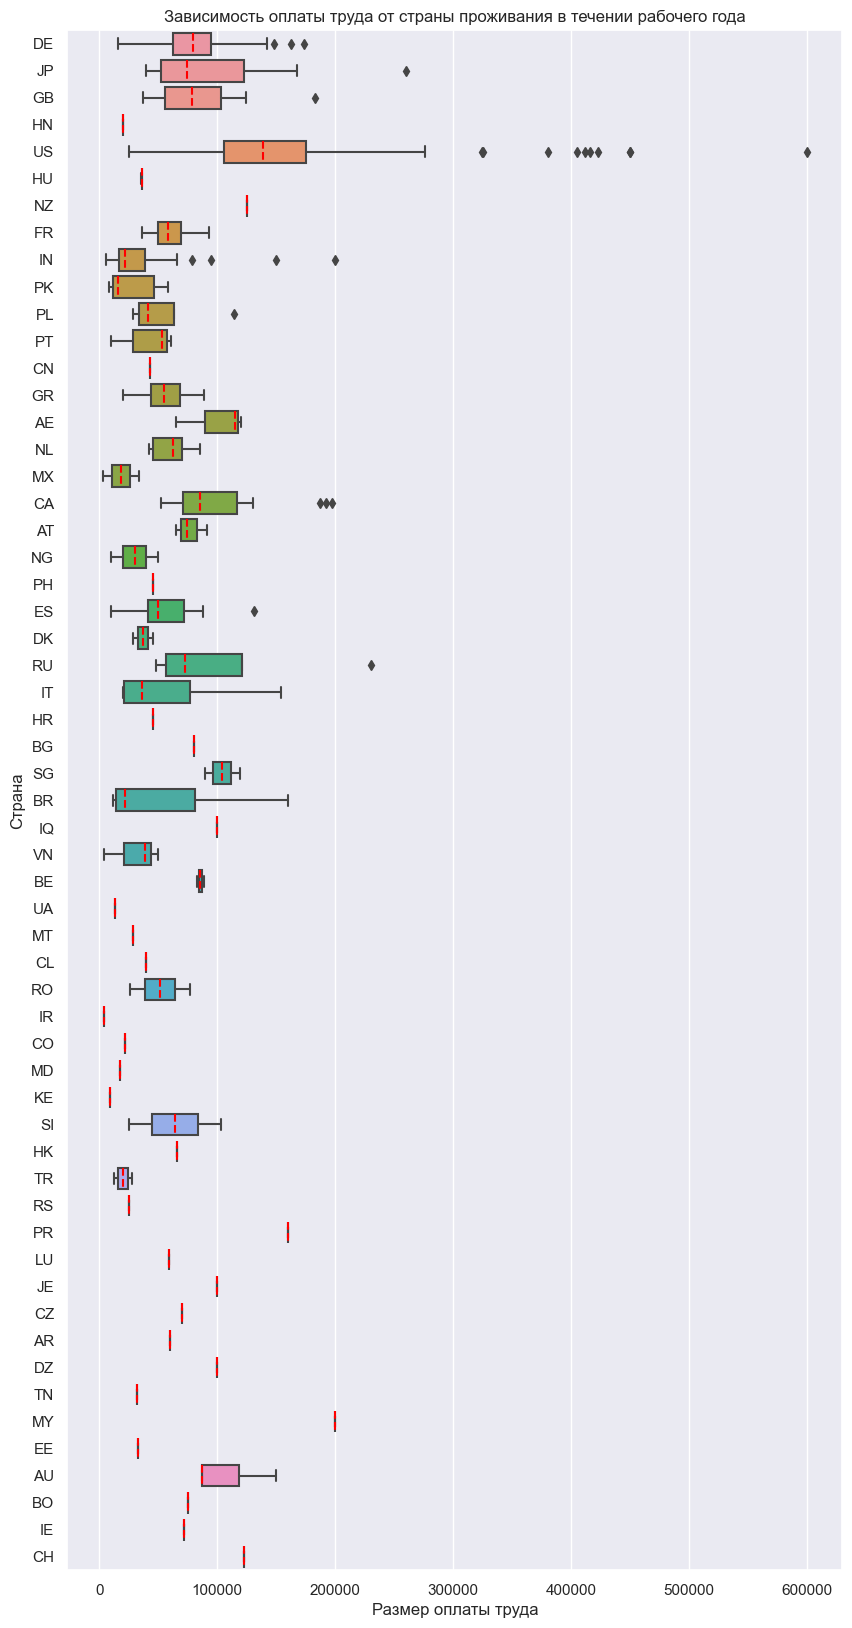

In [32]:
fig = plt.figure(figsize=(10, 20))
ax = sns.boxplot(data, x='salary_in_usd', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Страна')
plt.title('Зависимость оплаты труда от страны проживания в течении рабочего года')
plt.show()

In [34]:
data_agg = data.groupby('employee_residence')['salary_in_usd'].describe().round(2)
print('Зависимость оплаты труда от страны проживания в течении рабочего года')
data_agg

Зависимость оплаты труда от страны проживания в течении рабочего года


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AR,1.0,60000.00,NaN,60000.0,60000.00,60000.0,60000.00,60000.0
AT,3.0,76738.67,13386.02,64849.0,69489.50,74130.0,82683.50,91237.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0
BG,1.0,80000.00,NaN,80000.0,80000.00,80000.0,80000.00,80000.0
BO,1.0,75000.00,NaN,75000.0,75000.00,75000.0,75000.00,75000.0
BR,6.0,54634.67,61537.35,12000.0,14402.50,21453.5,81000.00,160000.0
CA,29.0,97085.31,39767.44,52000.0,70912.00,85000.0,117104.00,196979.0


Среднее значение оплаты труда значительно отличается по разным странам проживания соискателей. Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Зависимость заработной платы от страны, где размещен главный офис компании

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


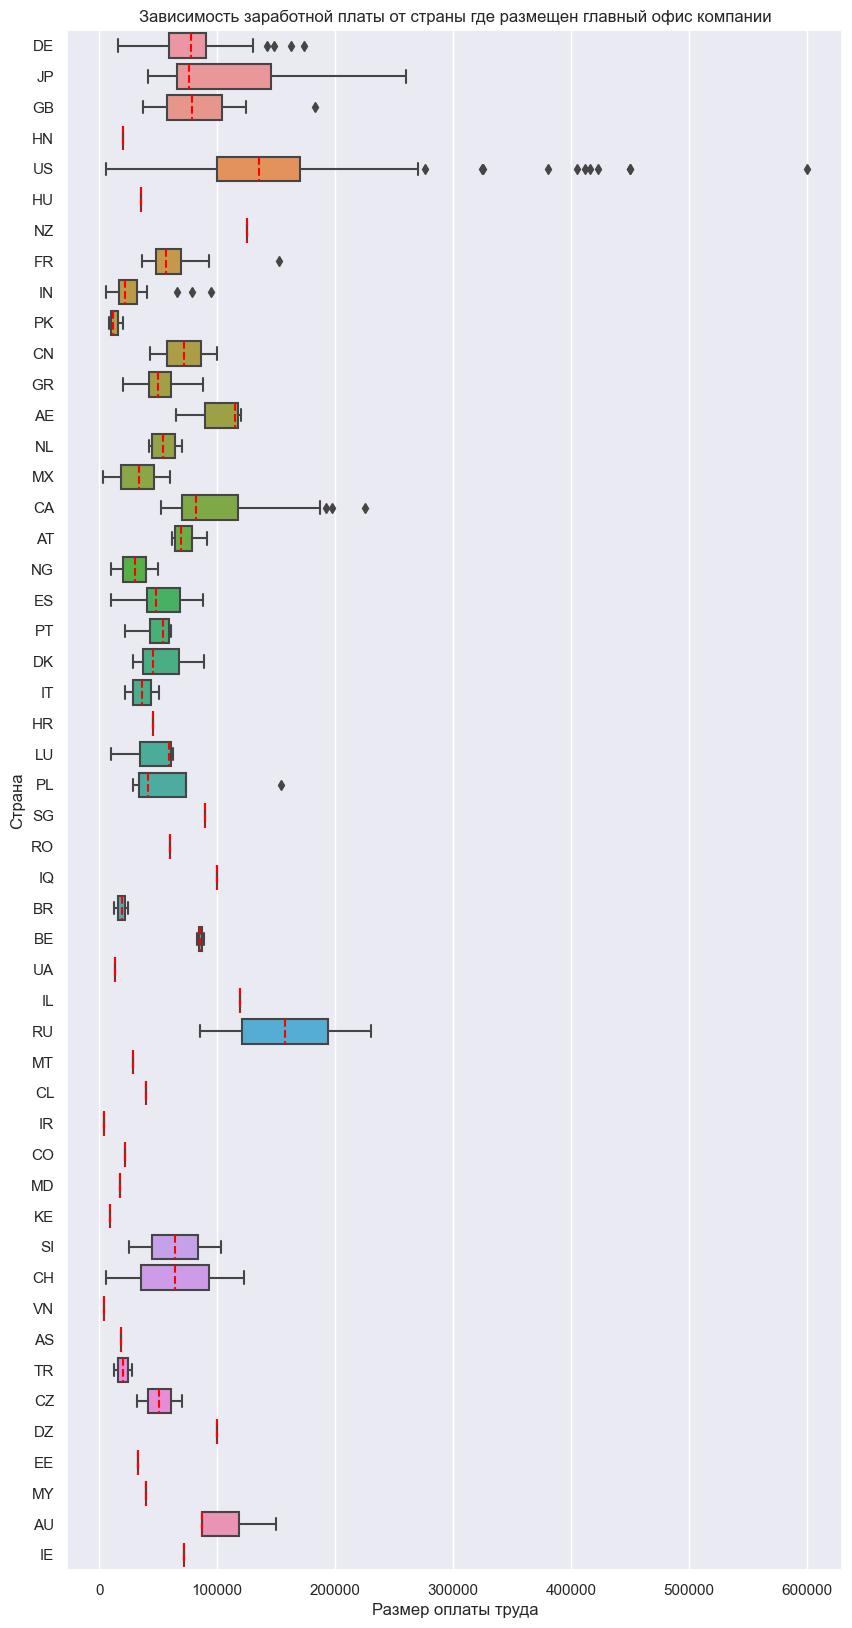

In [36]:
fig = plt.figure(figsize=(10, 20))
ax = sns.boxplot(data, x='salary_in_usd', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Страна')
plt.title('Зависимость заработной платы от страны где размещен главный офис компании')
plt.show()

In [37]:
data_agg = data.groupby('company_location')['salary_in_usd'].describe().round(2)
print('Зависимость заработной платы от страны где размещен главный офис компании')
data_agg

Зависимость заработной платы от страны где размещен главный офис компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
AS,1.0,18053.00,NaN,18053.0,18053.00,18053.0,18053.00,18053.0
AT,4.0,72920.75,13332.78,61467.0,64003.50,69489.5,78406.75,91237.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.00,4179.00,82744.0,84221.50,85699.0,87176.50,88654.0
BR,3.0,18602.67,5555.76,12901.0,15904.00,18907.0,21453.50,24000.0
CA,30.0,99823.73,46329.10,52000.0,69730.00,81895.5,117916.25,225000.0
CH,2.0,64114.00,82352.48,5882.0,34998.00,64114.0,93230.00,122346.0
CL,1.0,40038.00,NaN,40038.0,40038.00,40038.0,40038.00,40038.0


Среднее значение оплаты труда значительно отличается по разным странам размещения головного офиса компании. Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Зависимость оплаты труда от доли работы, выполняемой удаленно

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


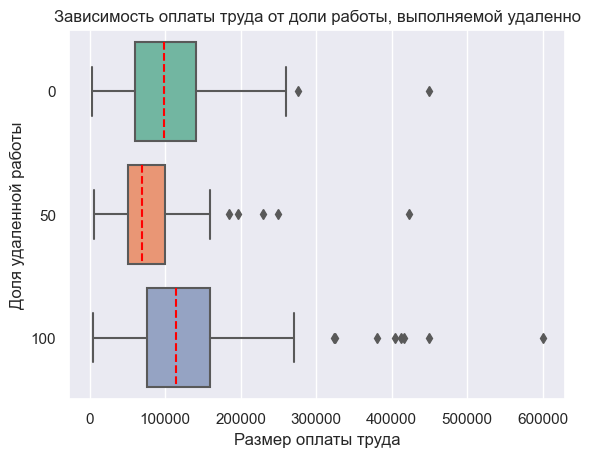

In [38]:
ax = sns.boxplot(data, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Доля удаленной работы')
plt.title('Зависимость оплаты труда от доли работы, выполняемой удаленно')
plt.show()

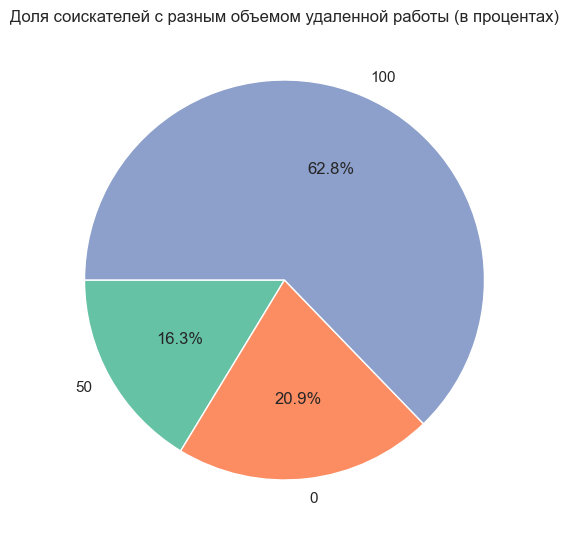

In [39]:
parts = data['remote_ratio'].value_counts().sort_values(ascending=True)
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    parts,
    labels=parts.index,
    autopct='%.1f%%',
    startangle=180
);
axes.set_title('Доля соискателей с разным объемом удаленной работы (в процентах)');

In [40]:
data_agg = data.groupby('remote_ratio')['salary_in_usd'].describe().round(2)
print('Зависимость оплаты труда от доли работы, выполняемой удаленно')
data_agg

Зависимость оплаты труда от доли работы, выполняемой удаленно


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,127.0,106354.62,67724.54,2859.0,60000.0,99000.0,140400.0,450000.0
50,99.0,80823.03,57353.09,5409.0,50355.0,69999.0,99851.5,423000.0
100,381.0,122457.45,72710.84,4000.0,75774.0,115000.0,160000.0,600000.0


Среднее значение оплаты труда значительно отличается в зависимости от доли работы, выполняемой удаленно. Также наибольшее количество соискателей полностью работают удаленно. Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Зависимость размера заработной платы от размеров компании

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


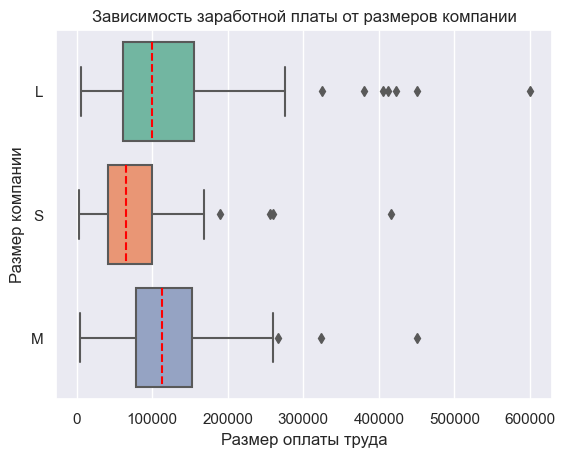

In [41]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Размер компании')
plt.title('Зависимость заработной платы от размеров компании')
plt.show()

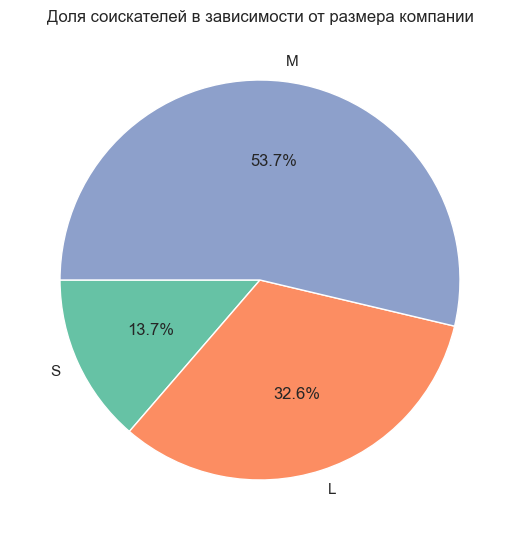

In [42]:
parts = data['company_size'].value_counts().sort_values(ascending=True)
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    parts,
    labels=parts.index,
    autopct='%.1f%%',
    startangle=180
);
axes.set_title('Доля соискателей в зависимости от размера компании');

In [43]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зависимость заработной платы от размера компании')
data_agg

Зависимость заработной платы от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


Из визуализации полученных данных можно сделать вывод, что с увеличением размера компании увеличивается и средняя зарплата соискателей. Кроме того, большинство соискателей предпочитают компании среднего размера. Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

#### Вывод по результатам визуального анализа

Предварительно можно рссудить, что наиболее важными факторами, влияющими на размер зартлаты в Data Science являются год, в котором была выплачена зарплата, тип трудоустройства, опыт работы, объем удаленной работы и размер компании. Для выводов по остальным признакам тредуются дополнительные исследования.

## 2.2 Статистический анализ данных



In [46]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплат у специалистов Data Science в 2020 г. ($μ_1$) меньше или равен размеру зарплат у специалистов Data Science в 2021 г. ($μ_2$) и размер зарплат у специалистов Data Scientist в 2021 г. ($μ_2$) меньше или равен размеру зарплат у специалистов Data Science в 2022 г. ($μ_3$)

$$ H_0 : μ_1 <= μ_2; μ_2 <= μ_3 $$

*Альтернативная гипотеза* ($H_1$): размер зарплат у специалистов Data Science в 2020 г. ($μ_1$) больше размера зарплат у специалистов Data Science в 2021 г. ($μ_2$) и размер зарплат у специалистов Data Science в 2021 г. ($μ_2$) больше размера зарплат у специалистов Data Science в 2022 г. ($μ_3$)

$$ H_1 : μ_1 > μ_2; μ_2 > μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [47]:
# значения зарплат
sals_2020= data.loc[data['work_year']==2020, 'salary_in_usd']
sals_2021 = data.loc[data['work_year']==2021, 'salary_in_usd']
sals_2022 = data.loc[data['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('2020')
result = stats.shapiro(sals_2020)
decision_normality(result[1])

print('2021')
result = stats.shapiro(sals_2021)
decision_normality(result[1])

print('2022')
result = stats.shapiro(sals_2022)
decision_normality(result[1])


2020
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2021
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2022
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зрплаты»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса для сравнения распределений.

**Проведём тест**

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зрплаты»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса для сравнения распределений.

**Проведём тест**

In [48]:
# проводим тест
_, p = stats.kruskal(sals_2020, sals_2021, sals_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплата в сфере Data Science увеличивалась каждый год по сравнению с предыдущим.

### Влияет ли опыт работы на размер выплат?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплаты не различается у специальстов с разным опытом работы: EN — Entry-level/Junior ($μ_1$), MI — Mid-level/Intermediate ($μ_2$), SE — Senior-level/Expert ($μ_3$), EX — Executive-level/Director ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер зарплаты различается у специальстов с разным опытом работы: EN — Entry-level/Junior ($μ_1$), MI — Mid-level/Intermediate ($μ_2$), SE — Senior-level/Expert ($μ_3$), EX — Executive-level/Director ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [49]:
# значения страховых выплат
exp_en = data.loc[data['experience_level']=='EN', 'salary_in_usd']
exp_mi = data.loc[data['experience_level']=='MI', 'salary_in_usd']
exp_se = data.loc[data['experience_level']=='SE', 'salary_in_usd']
exp_ex = data.loc[data['experience_level']=='EX', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('EN')
result = stats.shapiro(exp_en)
decision_normality(result[1])

print('MI')
result = stats.shapiro(exp_mi)
decision_normality(result[1])

print('SE')
result = stats.shapiro(exp_se)
decision_normality(result[1])

print('EX')
result = stats.shapiro(exp_ex)
decision_normality(result[1])

EN
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
MI
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
SE
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
EX
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса для сравнения распределений.

**Проведём тест**